# Домашка 
---------------------------------------

tldr:
    
* Выбрать архитектуру из рассказанных NST, pix2pix, CycleGAN$^1$
* Подберите к ней задачу, чтобы она вам нравилась
* Подберите еще одну задачу, которая уже решена (если не NST)
* Повторите решение, которое уже есть$^2$ (если не NST)
* Решите свою задачу

---------------------------------------
1. Расположены в порядке возрастания сложности и крутизны
2. Поверьте если вы сделаете этот пункт следующий будет в *разы* легче

## Если вы выбрали Neural Style Transfer
---------------------------------------
Тут все довольно просто на первый и на второй взгляд. Поэтому недосотаточно просто написать свою функцию потерь и сдать ноутбук. Если вы хотите приличных баллов, то у вас есть две опции:


1. Вы разделяете картинку на две части и переносите на них разные стили. <p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала к одной чати картинки, а потом к другой.</span></p> От вас ожидается, что вы отдадите нейросети два картинки стиля и она внутри себя(скорее внутри лосс функции) разделит выходную картинку на две части и к одной части применит один стиль, а к другой - второй. 

2. Вы переносите *одновременно* два стиля на одну картинку контента.
<p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала с одним стилем, а потом с другим.</span></p>
От вас ожидается, что вы модифицируете модель(скорее лосс модели) для того, чтобы два стиля учитывались с разными весами. 

## Если вы выбрали pix2pix
---------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для pix2pix модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все безплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Если вы выбрали CycleGAN
--------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для CycleGAN модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. CycleGAN в этом смысле хуже, чем pix2pix, он ест больше памяти. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все беcплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Remarks:
-----------------------------------------

* Это задание нужно для того, чтобы вы наступили на все грабли, что есть. Узнали об их существовании и научились обходить. Посмотрели на неработающие модели и поняли, что все тлен. Изгуглили весь интернет и в конце заставили это все работать. Поверьте, оно того стиот. Не откладывайте это задание на ночь перед сдачей, так как весь смысл \*пуф\* улетучится.

* У вас два союзника в этой борьбе:
    1. Оригинальная статья, те психи, что ее писала как то заставили свою модель работать. Их мысли, которыми они спроводили свое детище, позволят вам написать свой вариант алгоритма. 
    2. Гугл, он знает ответы на почти все ваши вопросы, но у него есть две ипостаси одна простая в обещении и вы все ее занаете(русскоязычная), а есть еще одна, которая кусается, но знает больше(англоязычная). Если не знаете языва - учите на ходу :)
    
* На самом деле у вас есть еще один союзник, это ментор проекта(или лектор или семинарист). Его ресурсом нужно пользоваться в ситуации, в которой вы не можете(занчит попытались и не вышло) найти ответов, используя Гугл и статью.

* Сдавать это все нужно следующим образом. Код вы кидаете на github и отправляете ссылку туда, куда вам сказали(в телеграм, степик или еще куда-то)

In [ ]:
# Библиотеки
%matplotlib inline
from PIL import Image


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

In [ ]:
imsize = 256

loader = transforms.Compose([
    transforms.Resize((imsize, imsize)),  # подгоняем все изображения под размер 256х256
    transforms.ToTensor()])  # и переделываем в torch.tensor


def image_loader(image_name):  # функция для переделывания изображений в тензоры
    image = Image.open(image_name)
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)


morty_img = image_loader("morty.jpg")
rick_img = image_loader('rick.png')
gosling_img = image_loader("gosling.jpg")
scream_img = image_loader('munk.jpg')
picasso_img = image_loader('picasso.jpg')

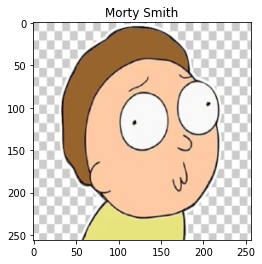

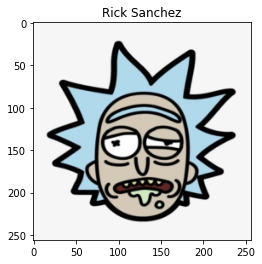

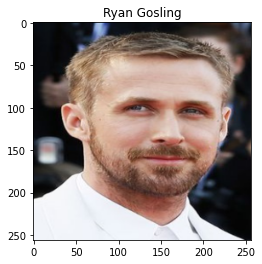

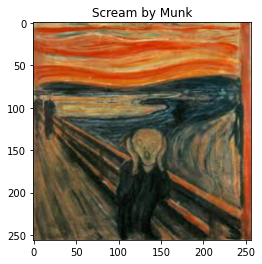

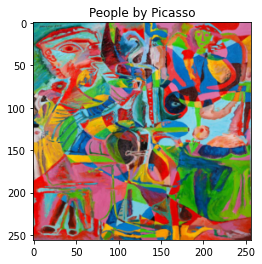

In [ ]:
unloader = transforms.ToPILImage() # тензор в картинку  

plt.ion() 

def imshow(tensor, title=None):
    image = tensor.cpu().clone()   
    image = image.squeeze(0)      # функция для отрисовки изображения
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) 

# отрисовка

plt.figure()
imshow(morty_img, title='Morty Smith')

plt.figure()
imshow(rick_img, title='Rick Sanchez')

plt.figure()
imshow(gosling_img, title='Ryan Gosling')

plt.figure()
imshow(scream_img, title='Scream by Munk')

plt.figure()
imshow(picasso_img, title='People by Picasso')

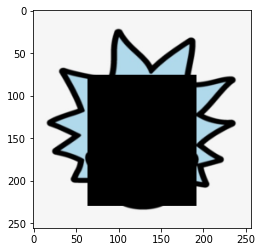

In [ ]:
# Ниже - маски, которые были использованы для наложения двух стилей одновременно
mask = torch.zeros(
                rick_img.shape,
                device=device, 
                dtype=torch.float
                )
center = (0.6*rick_img.shape[2], 0.5*rick_img.shape[3])
step = (0.3*rick_img.shape[2], 0.25*rick_img.shape[2])
mask[:,
     : ,
     int(center[0]-step[0]) : int(center[0]+step[0]),
     int(center[1]-step[1]) : int(center[1]+step[1])] = 1
mask = mask == 1
mask = ~mask
a = rick_img*mask
plt.figure()
imshow(a)

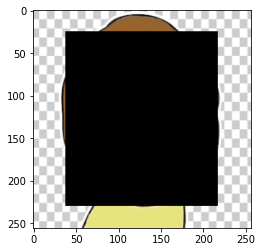

In [ ]:
mask = torch.zeros(
                morty_img.shape,
                device=device, 
                dtype=torch.float
                )
center = (0.5*morty_img.shape[2], 0.5*morty_img.shape[3])
step = (0.4*morty_img.shape[2], 0.35*morty_img.shape[2])
mask[:,
     : ,
     int(center[0]-step[0]) : int(center[0]+step[0]),
     int(center[1]-step[1]) : int(center[1]+step[1])] = 1
mask = mask == 1
mask = ~mask
a = morty_img*mask
plt.figure()
imshow(a)

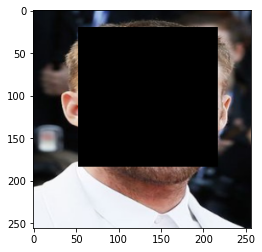

In [ ]:
mask = torch.zeros(
                gosling_img.shape,
                device=device, 
                dtype=torch.float
                )
center = (0.4*gosling_img.shape[2], 0.53*gosling_img.shape[3])
step = (0.32*gosling_img.shape[2], 0.32*gosling_img.shape[2])
mask[:,
     : ,
     int(center[0]-step[0]) : int(center[0]+step[0]),
     int(center[1]-step[1]) : int(center[1]+step[1])] = 1
mask = mask == 1
mask = ~mask
a = gosling_img*mask
plt.figure()
imshow(a)

In [ ]:
class ContentLoss(nn.Module):  # считаем контент-лосс

        def __init__(self, target,):
            super(ContentLoss, self).__init__()
            self.target = target.detach()
            self.loss = F.mse_loss(self.target, self.target)

        def forward(self, input):
            self.loss = F.mse_loss(input, self.target)
            return input

In [ ]:
def gram_matrix(y): # матрица грама (оригинальная версия)
    (b, ch, h, w) = y.size()
    features = y.view(b, ch, w * h)
    features_t = features.transpose(1, 2) 
    gram = features.bmm(features_t) / (ch * h * w)
    return gram


class StyleLoss(nn.Module):  # считаем стайл-лосс
        def __init__(self, target_feature, style):
            super(StyleLoss, self).__init__()
            self.target = gram_matrix(target_feature).detach()
            self.loss = F.mse_loss(self.target, self.target)
            self.style = style

        def forward(self, input):
            mask = torch.zeros(  # создаем маску по вышеупомянутым значениям
                input.shape,
                device=device, 
                dtype=torch.float
                )
            # числа здесь зависят от того, какую картинку мы используем как input
            # (меняются руками)
            center = (0.6*input.shape[2], 0.5*input.shape[3])
            step = (0.3*input.shape[2], 0.25*input.shape[2])
            mask[:,
                  :,
                  int(center[0]-step[0]) : int(center[0]+step[0]),
                  int(center[1]-step[1]) : int(center[1]+step[1])] = 1
            if self.style == 1:  # если номер стиля не 0, меняем маску на обратную
                mask = mask == 1  # меняем числа 1|0 на True|False
                mask = ~mask  # меняем все True на False, все False на True
            G = gram_matrix(input*mask)  # матрицу грама считаем только в тех местах, которые "не закрыты" маской
            self.loss = F.mse_loss(G, self.target)
            return input

In [ ]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)


class Normalization(nn.Module):  # нормализация
        def __init__(self, mean, std):
            super(Normalization, self).__init__()
            # .view the mean and std to make them [C x 1 x 1] so that they can
            # directly work with image Tensor of shape [B x C x H x W].
            # B is batch size. C is number of channels. H is height and W is width.
            self.mean = torch.tensor(mean).view(-1, 1, 1)
            self.std = torch.tensor(std).view(-1, 1, 1)

        def forward(self, img):
            # normalize img
            return (img - self.mean) / self.std

In [ ]:
content_layers_default = ['conv_4']  # слои VGG19, которые будем использовать
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

In [ ]:
cnn = models.vgg19(pretrained=True).features.to(device).eval()  # берем уже обученную VGG19

In [ ]:
def get_style_model_and_losses(cnn,
                               normalization_mean,
                               normalization_std,
                               style_imgs,
                               content_img,
                               content_layers=content_layers_default,
                               style_layers=style_layers_default
                               ):
        cnn = copy.deepcopy(cnn)

        # normalization module
        normalization = Normalization(
            normalization_mean, 
            normalization_std).to(device)

        # just in order to have an iterable access to or list of content/style
        # losses
        content_losses = []
        style_losses = []

        # assuming that cnn is a nn.Sequential, so we make a new nn.Sequential
        # to put in modules that are supposed to be activated sequentially
        model = nn.Sequential(normalization)

        i = 0  # increment every time we see a conv
        for layer in cnn.children():
            if isinstance(layer, nn.Conv2d):
                i += 1
                name = 'conv_{}'.format(i)
            elif isinstance(layer, nn.ReLU):
                name = 'relu_{}'.format(i)
                # The in-place version doesn't play very nicely with the ContentLoss
                # and StyleLoss we insert below. So we replace with out-of-place
                # ones here.
                #Переопределим relu уровень
                layer = nn.ReLU(inplace=False)
            elif isinstance(layer, nn.MaxPool2d):
                name = 'pool_{}'.format(i)
            elif isinstance(layer, nn.BatchNorm2d):
                name = 'bn_{}'.format(i)
            else:
                raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

            model.add_module(name, layer)

            if name in content_layers:
                # add content loss:
                target = model(content_img).detach()
                content_loss = ContentLoss(target)
                model.add_module("content_loss_{}".format(i), content_loss)
                content_losses.append(content_loss)

            if name in style_layers:
                # add style loss:
                for k, img in enumerate(style_imgs):  # для каждого стиля (всего 2) считаем свой собственный стайл-лосс
                    target_feature = model(img).detach()
                    style_loss = StyleLoss(target_feature, k)
                    model.add_module("style_loss_{}_{}".format(i, k), style_loss)
                    style_losses.append(style_loss)

        # выбрасываем все уровни после последнего style loss или content loss
        for i in range(len(model) - 1, -1, -1):
            if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
                break

        model = model[:(i + 1)]

        return model, style_losses, content_losses

In [ ]:
def get_input_optimizer(input_img):
        # добавляет содержимое тензора картинки
        # в список изменяемых оптимизатором параметров
        optimizer = optim.LBFGS([input_img.requires_grad_()]) 
        return optimizer

In [ ]:
def run_style_transfer(cnn, 
                       normalization_mean, 
                       normalization_std,
                       content_img, 
                       style_imgs, 
                       input_img, 
                       num_steps,
                       style_weight=100000, 
                       content_weight=1
                       ):
        """Run the style transfer."""
        print('Building the style transfer model..')
        model, style_losses, content_losses = get_style_model_and_losses(
            cnn,
            normalization_mean, 
            normalization_std, 
            style_imgs, 
            content_img
            )
        optimizer = get_input_optimizer(input_img)

        print('Optimizing..')
        run = [0]
        while run[0] <= num_steps:

            def closure():
                # это для того, чтобы значения тензора картинки
                # не выходили за пределы [0;1]
                input_img.data.clamp_(0, 1)

                optimizer.zero_grad()

                model(input_img)

                style_score = 0
                content_score = 0

                for sl in style_losses:
                    style_score += sl.loss
                for cl in content_losses:
                    content_score += cl.loss
                
                # взвешивание ошибки
                style_score *= style_weight
                content_score *= content_weight

                loss = style_score + content_score
                loss.backward()

                run[0] += 1
                if run[0] % 50 == 0:
                    print("run {}:".format(run))
                    print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                        style_score.item(), content_score.item()))
                    print()

                return style_score + content_score

            optimizer.step(closure)

        # a last correction...
        input_img.data.clamp_(0, 1)

        return input_img

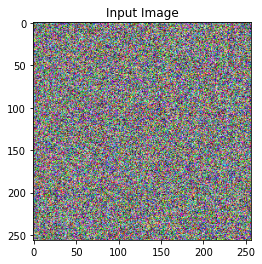

Building the style transfer model..
Optimizing..


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


run [50]:
Style Loss : 220.636902 Content Loss: 140.277222

run [100]:
Style Loss : 74.116005 Content Loss: 133.222687

run [150]:
Style Loss : 41.837421 Content Loss: 123.389999

run [200]:
Style Loss : 30.380129 Content Loss: 114.493172

run [250]:
Style Loss : 24.239660 Content Loss: 108.166031

run [300]:
Style Loss : 22.618620 Content Loss: 102.909500

run [350]:
Style Loss : 19.356518 Content Loss: 99.883812

run [400]:
Style Loss : 19.573565 Content Loss: 96.987785

run [450]:
Style Loss : 19.852139 Content Loss: 94.838707

run [500]:
Style Loss : 56.612236 Content Loss: 98.971886



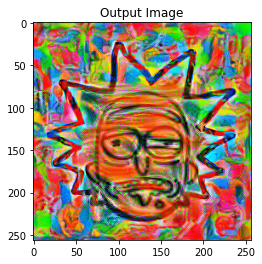

In [ ]:
# input_img = content_img.clone()
input_img = torch.randn(rick_img.data.size(), device=device)

plt.figure()
imshow(input_img, title='Input Image')
output = run_style_transfer(cnn, 
                            cnn_normalization_mean, 
                            cnn_normalization_std, 
                            rick_img,
                            [scream_img, picasso_img],
                            input_img,
                            num_steps=500
                            )
plt.figure()
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

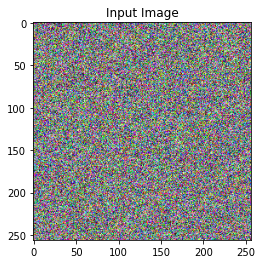

Building the style transfer model..
Optimizing..


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


run [50]:
Style Loss : 209.478470 Content Loss: 132.377090

run [100]:
Style Loss : 69.405479 Content Loss: 127.059418

run [150]:
Style Loss : 39.801350 Content Loss: 117.912933

run [200]:
Style Loss : 32.720871 Content Loss: 110.348953

run [250]:
Style Loss : 24.044069 Content Loss: 105.705177

run [300]:
Style Loss : 19.789419 Content Loss: 101.970581

run [350]:
Style Loss : 18.661394 Content Loss: 98.842072

run [400]:
Style Loss : 15.974059 Content Loss: 96.363770

run [450]:
Style Loss : 16.486881 Content Loss: 94.678833

run [500]:
Style Loss : 14.083441 Content Loss: 92.700882



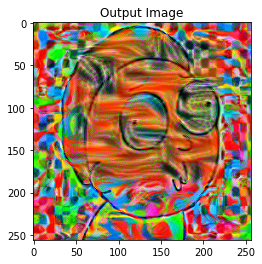

In [ ]:
# input_img = content_img.clone()
input_img = torch.randn(morty_img.data.size(), device=device)

plt.figure()
imshow(input_img, title='Input Image')
output = run_style_transfer(cnn, 
                            cnn_normalization_mean, 
                            cnn_normalization_std, 
                            morty_img,
                            [scream_img, picasso_img],
                            input_img,
                            num_steps=500
                            )
plt.figure()
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

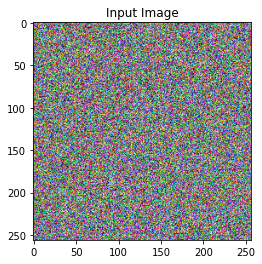

Building the style transfer model..
Optimizing..


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


run [50]:
Style Loss : 231.945465 Content Loss: 118.973640

run [100]:
Style Loss : 74.988693 Content Loss: 118.142548

run [150]:
Style Loss : 38.810417 Content Loss: 114.317749

run [200]:
Style Loss : 26.608311 Content Loss: 110.149635

run [250]:
Style Loss : 20.662100 Content Loss: 106.552803

run [300]:
Style Loss : 17.840145 Content Loss: 103.263428

run [350]:
Style Loss : 15.544081 Content Loss: 100.336594

run [400]:
Style Loss : 14.447234 Content Loss: 97.812248

run [450]:
Style Loss : 14.391923 Content Loss: 95.804459

run [500]:
Style Loss : 12.769492 Content Loss: 94.307251



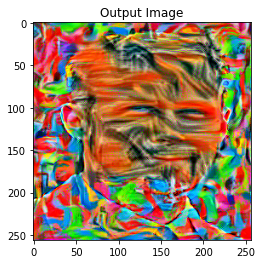

In [ ]:
# input_img = content_img.clone()
input_img = torch.randn(gosling_img.data.size(), device=device)

plt.figure()
imshow(input_img, title='Input Image')
output = run_style_transfer(cnn, 
                            cnn_normalization_mean, 
                            cnn_normalization_std, 
                            gosling_img,
                            [scream_img, picasso_img],
                            input_img,
                            num_steps=500
                            )
plt.figure()
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

# Результаты
Для одновременного переноса двух стилей на картинку был применен способ с маской. Метод довольно хорошо себя показал, разные стили действительно переносятся на разные участки картинки.
